<a href="https://colab.research.google.com/github/plaban1981/MachieHack/blob/master/Financial_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Risk Prediction 

In [1]:
from google.colab import files
files.upload()

Saving Financial_Risk_Participants_Data.zip to Financial_Risk_Participants_Data.zip


{'Financial_Risk_Participants_Data.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\xf1N\xadP\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00!\x00 \x00Financial_Risk_Participants_Data/UT\r\x00\x07\xbfv\xbb^\xc1v\xbb^\xbfv\xbb^ux\x0b\x00\x01\x04\xf6\x01\x00\x00\x04\x14\x00\x00\x00PK\x03\x04\x14\x00\x08\x00\x08\x00\x8bL\xadP\x00\x00\x00\x00\x00\x00\x00\x00\x04\x18\x00\x00*\x00 \x00Financial_Risk_Participants_Data/.DS_StoreUT\r\x00\x07>r\xbb^;v\xbb^>r\xbb^ux\x0b\x00\x01\x04\xf6\x01\x00\x00\x04\x14\x00\x00\x00\xed\x98;\x0e\xc20\x10Dg\x8d\x0bK4.)\xddp\x00n`E\xc9\t\xb8\x00\x05W\xa0\xf7\xd1!\xda\x11\xb2\x14RP%\x82y\x92\xf5V\x8a\x7fi\x1cO\x00\xd8\xf0\xb8_\x80\x0c \xc1\x8d3>\x92\xd8\x16\x84\xae6\xce!\x84\x10B\x88}c\xaet\xdcv\x1bB\x88\x1d2\x9f\x0f\x85\xaets\x1b\x9f\x07:vc2]\xe8J7\xb7\xb1_\xa0#\x9d\xe8L\x17\xba\xd2\xcd\xcdC\xcb\x18>\x8c+\x1b\x13\x8a1\x85X\xa1\xebW\xaf,\xc4\xdfpp\xe5\xf9\xfb?a5\xff\x0b!~\x18\x8b\xe3u\x1c\xf0\x0e\x04\xcb\x0e\xafv\xeb\xea\x86\xf5K@\xf0\x9f\x85\xa7nl\xa1+\xdd\xdc\xba\x08\x

In [2]:
!unzip Financial_Risk_Participants_Data.zip

Archive:  Financial_Risk_Participants_Data.zip
   creating: Financial_Risk_Participants_Data/
  inflating: Financial_Risk_Participants_Data/.DS_Store  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._.DS_Store  
  inflating: Financial_Risk_Participants_Data/Test.csv  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._Test.csv  
  inflating: Financial_Risk_Participants_Data/Sample_Submission.xlsx  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._Sample_Submission.xlsx  
  inflating: Financial_Risk_Participants_Data/Train.csv  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._Train.csv  


In [0]:
!unzip Financial_Risk_Participants_Data.zip

Archive:  Financial_Risk_Participants_Data.zip
   creating: Financial_Risk_Participants_Data/
  inflating: Financial_Risk_Participants_Data/.DS_Store  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._.DS_Store  
  inflating: Financial_Risk_Participants_Data/Test.csv  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._Test.csv  
  inflating: Financial_Risk_Participants_Data/Sample_Submission.xlsx  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._Sample_Submission.xlsx  
  inflating: Financial_Risk_Participants_Data/Train.csv  
  inflating: __MACOSX/Financial_Risk_Participants_Data/._Train.csv  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [0]:
train = pd.read_csv('/content/Financial_Risk_Participants_Data/Train.csv')
test = pd.read_csv('/content/Financial_Risk_Participants_Data/Test.csv')

In [248]:
test.shape,train.shape

((233, 7), (543, 8))

In [249]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [250]:
for col in test.columns:
  if col != 'Location_Score':
    print(col)
    print([val for val in test[col].unique() if val not in train[col].unique()])

City
[34, 36]
Internal_Audit_Score
[]
External_Audit_Score
[]
Fin_Score
[]
Loss_score
[]
Past_Results
[5]


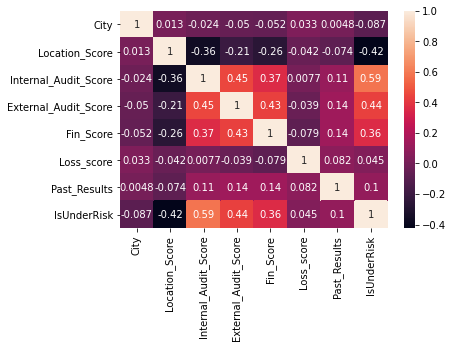

In [251]:
sns.heatmap(train.corr(),annot=True)

## Create Features

In [0]:
variables = ['External_Audit_Score','Internal_Audit_Score',
 'Fin_Score',
 'Loss_score']

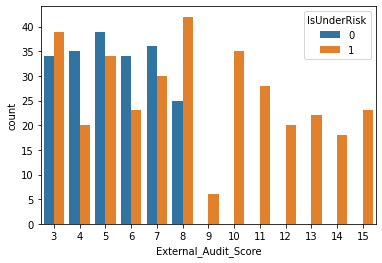

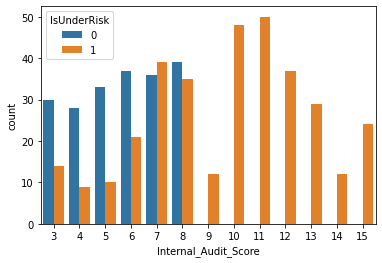

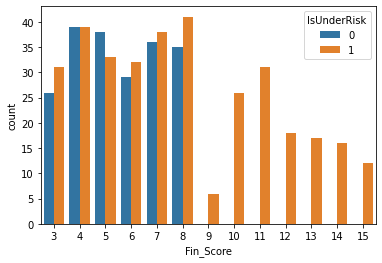

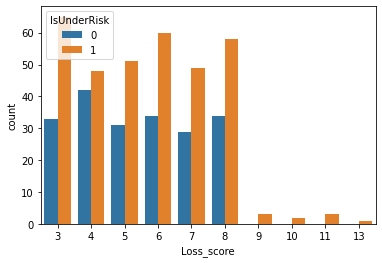

In [253]:
for col in variables :
  sns.countplot(x=col,data=train,hue='IsUnderRisk')
  plt.show()

As evident from the plot above that scernarios of high risk lies in scores above 8

# High Risk Scenario

In [0]:
train['IsInternal'] = np.where(train['Internal_Audit_Score'] > 8,1,0)
train['IsExternal'] = np.where(train['External_Audit_Score'] > 8,1,0)
train['IsFin'] = np.where(train['Fin_Score'] > 8,1,0)


train['High_Risk'] = train['IsInternal'] + train['IsExternal'] + train['IsFin']
train['High_Risk'] = np.where(train['High_Risk']>=1,1,0)

In [0]:
test['IsInternal'] = np.where(test['Internal_Audit_Score'] > 8,1,0)
test['IsExternal'] = np.where(test['External_Audit_Score'] > 8,1,0)
test['IsFin'] = np.where(test['Fin_Score'] > 8,1,0)


test['High_Risk'] = test['IsInternal'] + test['IsExternal'] + test['IsFin']
test['High_Risk'] = np.where(test['High_Risk']>=1,1,0)

# High_Risk Visualization

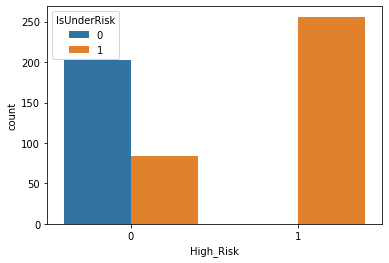

In [256]:
sns.countplot(x='High_Risk',data=train,hue='IsUnderRisk')

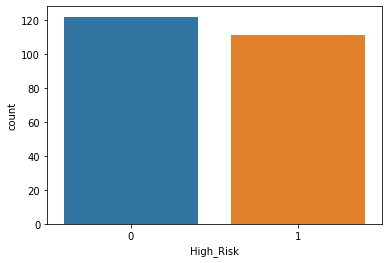

In [283]:
sns.countplot(x='High_Risk',data=test)

In [0]:
iA_dict = train.groupby('Internal_Audit_Score')['IsUnderRisk'].agg('mean').to_dict()
eA_dict = train.groupby('External_Audit_Score')['IsUnderRisk'].agg('mean').to_dict()
fin_dict = train.groupby('Fin_Score')['IsUnderRisk'].agg('mean').to_dict()
loss_dict = train.groupby('Loss_score')['IsUnderRisk'].agg('mean').to_dict()
train = train.copy()
train['loss_enc'] = train['Loss_score'].map(loss_dict)
train['fin_enc'] = train['Fin_Score'].map(fin_dict)
train['eA_enc'] = train['External_Audit_Score'].map(eA_dict)
train['iA_enc'] = train['Internal_Audit_Score'].map(iA_dict)

#
test = test.copy()
test['loss_enc'] = test['Loss_score'].map(loss_dict)
test['fin_enc'] = test['Fin_Score'].map(fin_dict)
test['eA_enc'] = test['External_Audit_Score'].map(eA_dict)
test['iA_enc'] = test['Internal_Audit_Score'].map(iA_dict)


In [228]:
train['Location_Score'].describe()

count    543.000000
mean      32.259346
std       24.887291
min        5.185000
25%       13.565000
50%       19.803000
75%       62.594000
max       80.809000
Name: Location_Score, dtype: float64

In [0]:
loc_dict = train.groupby('City')['Location_Score'].mean().to_dict()
train['avg_loc_score'] = train['City'].map(loc_dict)
test['avg_loc_score'] = test['City'].map(loc_dict)

In [0]:
t =5
train['Location_bin'], bin_edges = pd.qcut(train['Location_Score'],q=5,labels=['{}'.format(i) for i in range(1,t+1)],retbins=True)
test['Location_bin'], bin_edge = pd.qcut(test['Location_Score'],q=5,labels=['{}'.format(i) for i in range(1,t+1)],retbins=True)


In [0]:
results_table = pd.DataFrame(zip(bin_edges,['{}'.format(i) for i in range(1,t+1)]),
                            columns=['Threshold', 'Tier'])
results_table1 = pd.DataFrame(zip(bin_edge,['{}'.format(i) for i in range(1,t+1)]),
                            columns=['Threshold', 'Tier'])

In [261]:
results_table

,Threshold,Tier
0,5.1850,1
1,12.0816,2
2,17.0312,3
3,22.5254,4
4,66.0988,5


In [262]:

results_table1

,Threshold,Tier
0,5.4690,1
1,10.8340,2
2,16.9908,3
3,22.9406,4
4,64.7826,5


In [0]:
location_bin_dict= train.groupby('Location_bin')['IsUnderRisk'].mean().to_dict()

train['location_bin_avg'] = train['Location_bin'].map(location_bin_dict).astype('float')
test['location_bin_avg'] = test['Location_bin'].map(location_bin_dict).astype('float')

In [0]:
train['Location_bin'] =train['Location_bin'].astype('float')
test['Location_bin'] =test['Location_bin'].astype('float')

In [265]:
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk', 'IsInternal', 'IsExternal', 'IsFin', 'High_Risk',
       'loss_enc', 'fin_enc', 'eA_enc', 'iA_enc', 'avg_loc_score',
       'Location_bin', 'location_bin_avg'],
      dtype='object')

In [266]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
 8   IsInternal            543 non-null    int64  
 9   IsExternal            543 non-null    int64  
 10  IsFin                 543 non-null    int64  
 11  High_Risk             543 non-null    int64  
 12  loss_enc              543 non-null    float64
 13  fin_enc               543 non-null    float64
 14  eA_enc                543 non-null    float64
 15  iA_enc                5

In [267]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
IsInternal              0
IsExternal              0
IsFin                   0
High_Risk               0
loss_enc                0
fin_enc                 0
eA_enc                  0
iA_enc                  0
avg_loc_score           0
Location_bin            0
location_bin_avg        0
dtype: int64

In [268]:
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk', 'IsInternal', 'IsExternal', 'IsFin', 'High_Risk',
       'loss_enc', 'fin_enc', 'eA_enc', 'iA_enc', 'avg_loc_score',
       'Location_bin', 'location_bin_avg'],
      dtype='object')

In [0]:
train = train[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsInternal', 'IsExternal', 'IsFin', 'High_Risk',
       'loss_enc', 'fin_enc', 'eA_enc', 'iA_enc', 'avg_loc_score',
       'Location_bin', 'location_bin_avg','IsUnderRisk']]

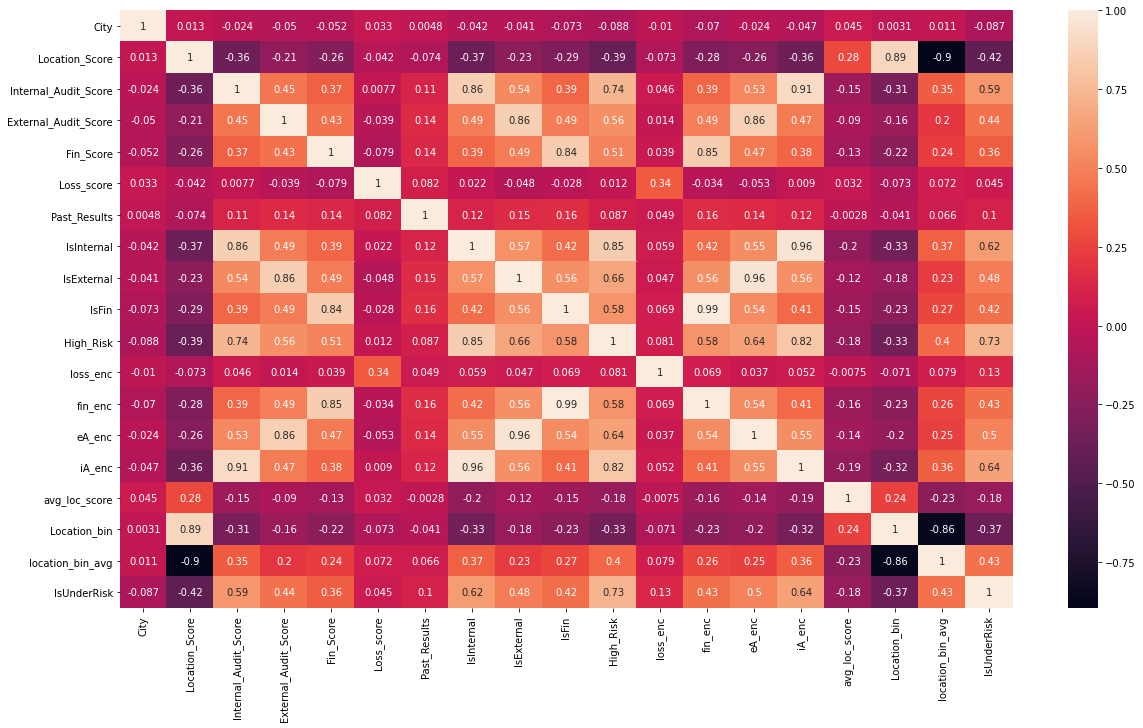

In [270]:
plt.figure(figsize=(20,11))
sns.heatmap(train.corr(),annot=True)

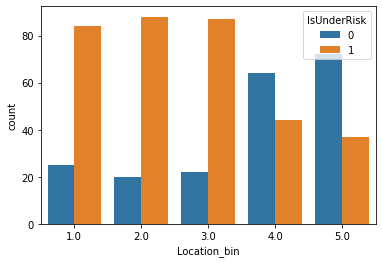

In [271]:
sns.countplot(x='Location_bin',data=train,hue='IsUnderRisk')

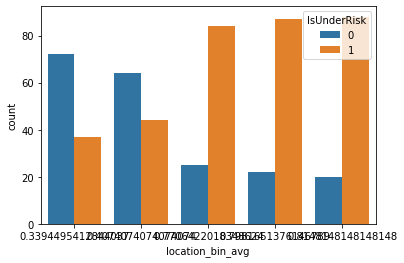

In [272]:
sns.countplot(x='location_bin_avg',data=train,hue='IsUnderRisk')

In [0]:
train['total_score'] = train['External_Audit_Score'] + train['Internal_Audit_Score']+train['Fin_Score']
test['total_score'] = test['External_Audit_Score'] + test['Internal_Audit_Score']+test['Fin_Score']

In [0]:
train['total_score_bin'], bin_edges = pd.qcut(train['total_score'],q=5,labels=['{}'.format(i) for i in range(1,t+1)],retbins=True)
test['total_score_bin'], bin_edge = pd.qcut(test['total_score'],q=5,labels=['{}'.format(i) for i in range(1,t+1)],retbins=True)

In [0]:
train['total_score_bin'] = train['total_score_bin'].astype('float')
test['total_score_bin'] = test['total_score_bin'].astype('float')

In [0]:
city_avg_dict = train.groupby('City')['total_score'].mean().to_dict()
train['avg_total_score'] = train['City'].map(city_avg_dict)
test['avg_total_score'] = test['City'].map(city_avg_dict)

In [277]:
label_corr =train.corr().loc['IsUnderRisk',:].to_dict()
sorted(label_corr.items(),key=lambda x:abs(x[1]),reverse=True)

[('IsUnderRisk', 1.0),
 ('High_Risk', 0.7297726695423098),
 ('iA_enc', 0.6427707154313681),
 ('total_score_bin', 0.6259259881364734),
 ('IsInternal', 0.6183900513054725),
 ('total_score', 0.5909412414848346),
 ('Internal_Audit_Score', 0.5860967417100856),
 ('eA_enc', 0.5040812192763616),
 ('IsExternal', 0.4817724658915572),
 ('External_Audit_Score', 0.43561859069376935),
 ('location_bin_avg', 0.42972400553806567),
 ('fin_enc', 0.4274563042260629),
 ('IsFin', 0.4247425846612426),
 ('Location_Score', -0.42395556009474217),
 ('Location_bin', -0.3710881413200365),
 ('Fin_Score', 0.36246276167881003),
 ('avg_total_score', 0.24234714003463),
 ('avg_loc_score', -0.1752572364275691),
 ('loss_enc', 0.1311273186226489),
 ('Past_Results', 0.1021195078363534),
 ('City', -0.08746281929727717),
 ('Loss_score', 0.044888053007836694)]

In [278]:
imp_features = [x[0] for x in sorted(label_corr.items(),key=lambda x:abs(x[1]),reverse=True) if x[1] > 0.25]
imp_features

['IsUnderRisk',
 'High_Risk',
 'iA_enc',
 'total_score_bin',
 'IsInternal',
 'total_score',
 'Internal_Audit_Score',
 'eA_enc',
 'IsExternal',
 'External_Audit_Score',
 'location_bin_avg',
 'fin_enc',
 'IsFin',
 'Fin_Score']

In [0]:
train = train[imp_features]
X = train.drop('IsUnderRisk',axis=1)
Y = train['IsUnderRisk']
test = test[[col for col in X.columns]]

In [363]:
train.shape,test.shape

((543, 14), (233, 13))

In [287]:
train.columns

Index(['IsUnderRisk', 'High_Risk', 'iA_enc', 'total_score_bin', 'IsInternal',
       'total_score', 'Internal_Audit_Score', 'eA_enc', 'IsExternal',
       'External_Audit_Score', 'location_bin_avg', 'fin_enc', 'IsFin',
       'Fin_Score'],
      dtype='object')

In [0]:
train = train[['High_Risk', 'iA_enc', 'total_score_bin', 'IsInternal',
       'total_score', 'Internal_Audit_Score', 'eA_enc', 'IsExternal',
       'External_Audit_Score', 'location_bin_avg', 'fin_enc', 'IsFin',
       'Fin_Score','IsUnderRisk']]

# Correlation with label

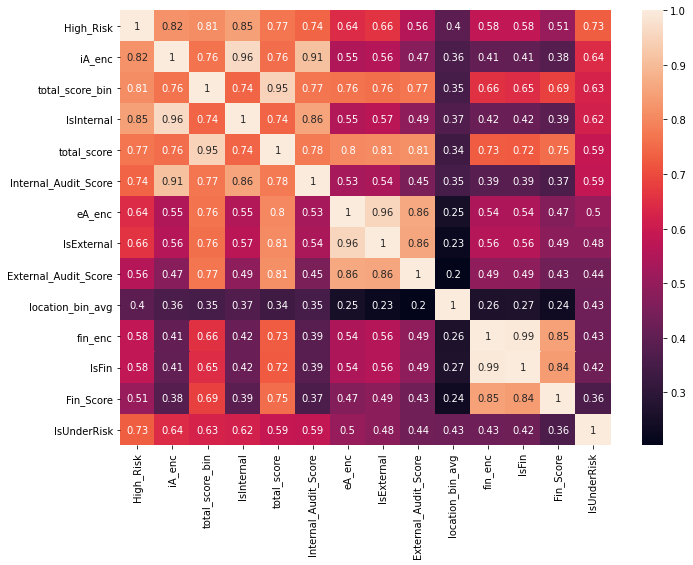

In [289]:
plt.figure(figsize=(11,8))
sns.heatmap(train.corr(),annot=True)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10,train_size=0.85,random_state=10)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
#from catboost import CatBoostRegressor

def comapre_model(feature,label,xtest,ytest):
  seed=1
  rf = RandomForestClassifier(max_depth = 2, n_estimators=120,random_state=seed)
  et = ExtraTreesClassifier(max_depth = 2, n_estimators=120,random_state=seed)
  ada = AdaBoostClassifier(random_state=seed)
  gbr = GradientBoostingClassifier(max_depth = 2, n_estimators=120,random_state=seed)
  xgboost = XGBClassifier(max_depth = 2, n_estimators=120,random_state=seed, n_jobs=-1, verbosity=0)
  lr = LogisticRegression(random_state=seed)
  lightgbm = lgb.LGBMClassifier(max_depth = 2, n_estimators=120,random_state=60)
  #catboost = CatBoostRegressor(random_state=seed, silent = True)
  names = ['RandomForestRegressor','adaboost','gbm','xgboost','lr','LightGBM']
  
  acc = []
  namem = []
  models =[rf,et,ada,gbr,xgboost,lr,lightgbm]
  for i,model in enumerate(models):
    i =i -1
    for tt,te in sss.split(X,Y):
      lgg  = []
      X_train,X_test = X.loc[tt],X.loc[te]
      y_train,y_test = Y[tt],Y[te]
      model.fit(feature,label)
      pred_ = model.predict(xtest)
      pred_proba= model.predict_proba(xtest)
      logloss = log_loss(ytest,pred_proba[:, 1])
      print('logloss : ',logloss)
      print(f'accuracy score :{accuracy_score(y_test,pred_)}')
      print("*"*80)
      lgg.append(logloss)
    print(names[i])
    namem.append(names[i])
    acc.append(np.mean(logloss))
  return [ namem,acc]

In [369]:
name,acc=comapre_model(X_train,y_train,X_test,y_test)

logloss :  0.3312102566181795
accuracy score :0.5121951219512195
********************************************************************************
logloss :  0.3312102566181795
accuracy score :0.5365853658536586
********************************************************************************
logloss :  0.3312102566181795
accuracy score :0.5121951219512195
********************************************************************************
logloss :  0.3312102566181795
accuracy score :0.4878048780487805
********************************************************************************
logloss :  0.3312102566181795
accuracy score :0.3902439024390244
********************************************************************************
logloss :  0.3312102566181795
accuracy score :0.5853658536585366
********************************************************************************
logloss :  0.3312102566181795
accuracy score :0.4878048780487805
***********************************************************

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


logloss :  0.2875384167929981
accuracy score :0.5487804878048781
********************************************************************************
logloss :  0.2875384167929981
accuracy score :0.5
********************************************************************************
logloss :  0.2875384167929981
accuracy score :0.5
********************************************************************************
logloss :  0.2875384167929981
accuracy score :0.5487804878048781
********************************************************************************
logloss :  0.2875384167929981
accuracy score :0.5
********************************************************************************
logloss :  0.2875384167929981
accuracy score :0.47560975609756095
********************************************************************************
logloss :  0.2875384167929981
accuracy score :0.524390243902439
********************************************************************************


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


logloss :  0.2875384167929981
accuracy score :0.8902439024390244
********************************************************************************
lr
logloss :  0.23814515254708632
accuracy score :0.524390243902439
********************************************************************************
logloss :  0.23814515254708632
accuracy score :0.5975609756097561
********************************************************************************
logloss :  0.23814515254708632
accuracy score :0.5487804878048781
********************************************************************************
logloss :  0.23814515254708632
accuracy score :0.5
********************************************************************************
logloss :  0.23814515254708632
accuracy score :0.47560975609756095
********************************************************************************
logloss :  0.23814515254708632
accuracy score :0.47560975609756095
****************************************************************

In [0]:
acc_df = pd.DataFrame({'Models':name,'Log_Loss':acc})

In [371]:
acc_df

,Models,Log_Loss
0,LightGBM,0.331210
1,RandomForestRegressor,0.365031
2,adaboost,0.480889
3,gbm,0.248554
4,xgboost,0.239410
5,lr,0.287538
6,LightGBM,0.238145


Hyper Parameter Tuning XGBOOST

In [0]:
for tt,te in sss.split(X,Y):
      X_train,X_test = X.loc[tt],X.loc[te]
      y_train,y_test = Y[tt],Y[te]

In [0]:
from sklearn.model_selection import RandomizedSearchCV
seed =10
param_grid = {'n_estimators':[100, 120,140,160,180,200],
                          'max_depth': [2,4,6,8,10], 
                          }

model_grid = RandomizedSearchCV(estimator=XGBClassifier(random_state=seed, n_jobs=-1, verbosity=0), 
                                        param_distributions=param_grid,n_iter=10, scoring='accuracy',
                                        cv=5, random_state=seed, n_jobs=-1)
        

model_grid.fit(X_train,y_train)
model = model_grid.best_estimator_
best_model = model_grid.best_estimator_
best_model_param = model_grid.best_params_  

In [403]:
model_xgb = model
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

Running 1 iteration
Running 2 iteration
Running 3 iteration
Running 4 iteration
Running 5 iteration
Running 6 iteration
Running 7 iteration
Running 8 iteration
Running 9 iteration
Running 10 iteration
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.27507412575831053 0.44205261238828786 0.3256172997496186


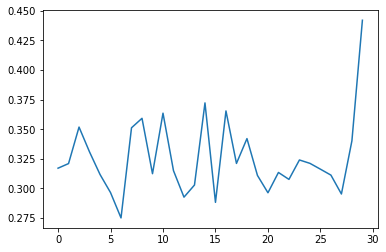

In [378]:
from sklearn.model_selection import StratifiedKFold
iterations = 10
scores = []
scores_val = []

for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits =3, shuffle=True)
    
    for train_index,test_index in kfold.split(X,Y):
        xtrain,xtest = X[X.index.isin(train_index)],X[X.index.isin(test_index)]
        ytrain,ytest = Y[train_index],Y[test_index]
        

        
        model  = model_xgb
        #model = RandomForestClassifier(max_depth=3,n_estimators=200)
        #model = LogisticRegression() 
        #model =  ComplementNB()
            
        model.fit(xtrain,ytrain)
            
        preds = model.predict_proba(xtest)
        
        scores.append(log_loss(ytest,preds))

        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(30)],y=scores))
print(min(scores),max(scores),np.mean(scores))

# Hyperparameter Tuning LightGBM

In [0]:

seed =10
param_grid = {'n_estimators':[100, 120,140,160,180,200],
                          'max_depth': [2,4,6,8,10], 
                          }

model_grid = RandomizedSearchCV(estimator=lgb.LGBMClassifier(random_state=seed), 
                                        param_distributions=param_grid, scoring='f1', n_iter=10, 
                                        cv=5, random_state=seed, n_jobs=-1)

model_grid.fit(X_train,y_train)
model = model_grid.best_estimator_
best_model = model_grid.best_estimator_
best_model_param = model_grid.best_params_   

In [417]:
model_lgbm = model
model_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=4,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=120, n_jobs=-1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Running 1 iteration
Running 2 iteration
Running 3 iteration
Running 4 iteration
Running 5 iteration
Running 6 iteration
Running 7 iteration
Running 8 iteration
Running 9 iteration
Running 10 iteration
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.27681508535878185 0.43252237492824336 0.33051260790481407


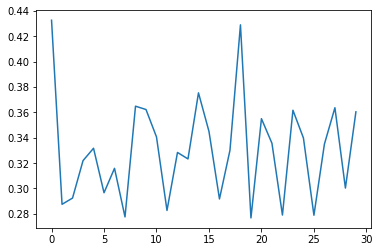

In [381]:
iterations = 10
scores = []
scores_val = []

for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 3, shuffle=True)
    
    for train_index,test_index in kfold.split(X,Y):
        xtrain,xtest = X[X.index.isin(train_index)],X[X.index.isin(test_index)]
        ytrain,ytest = Y[train_index],Y[test_index]
        

        
        model  = model_lgbm
        #model = RandomForestClassifier(max_depth=3,n_estimators=200)
        #model = LogisticRegression() 
        #model =  ComplementNB()
            
        model.fit(xtrain,ytrain)
            
        preds = model.predict_proba(xtest)
        
        scores.append(log_loss(ytest,preds))

        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(30)],y=scores))
print(min(scores),max(scores),np.mean(scores))

Running 1 iteration
Running 2 iteration
Running 3 iteration
Running 4 iteration
Running 5 iteration
Running 6 iteration
Running 7 iteration
Running 8 iteration
Running 9 iteration
Running 10 iteration
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.2835141586592647 0.37299890293013144 0.3219071435735935


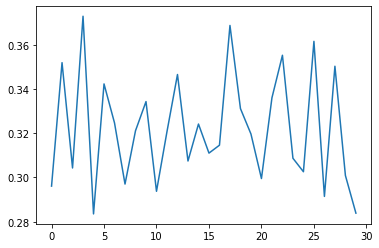

In [382]:
iterations = 10
scores = []
scores_val = []

for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 3, shuffle=True)
    
    for train_index,test_index in kfold.split(X,Y):
        xtrain,xtest = X[X.index.isin(train_index)],X[X.index.isin(test_index)]
        ytrain,ytest = Y[train_index],Y[test_index]
        

        
        #model  = model
        model = lgb.LGBMClassifier(max_depth = 2, n_estimators=120,random_state=60)
        #model = LogisticRegression() 
        #model =  ComplementNB()
            
        model.fit(xtrain,ytrain)
            
        preds = model.predict_proba(xtest)
        
        scores.append(log_loss(ytest,preds))

        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(30)],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [0]:
xgb = model_xgb
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)

In [424]:
probs = y_pred_proba[:, 1]
# calculate log loss
loss = log_loss(y_test, probs)
print(loss)

0.22936158644095087


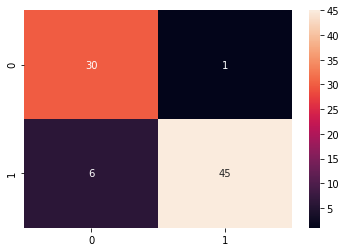

In [425]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [414]:
X_test.shape,test.shape

((82, 13), (233, 13))

In [0]:
y_pred_proba = xgb.predict_proba(test)
df_pred = pd.DataFrame(y_pred_proba,columns=['0','1'])
df_pred.to_excel('xgbmnew.xlsx',index=False)

In [418]:
import lightgbm
lgbm = model_lgbm
print(X_train.shape,X_test.shape)
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)

(461, 13) (82, 13)


In [419]:
lgbm.feature_importances_,lgbm.n_features_

(array([ 61, 102,  76,   0, 238,  33,  94,   0,  53, 121, 119,   0,  99]), 13)

In [420]:
probs = y_pred_proba[:, 1]
# calculate log loss
loss = log_loss(y_test, probs)
print(loss)

0.281885347732152


In [357]:
test.shape

(233, 13)

In [358]:
X_train.shape

(461, 10)

In [0]:
y_pred_proba = lgbm.predict_proba(test)
df_pred = pd.DataFrame(y_pred_proba,columns=['0','1'])
df_pred.to_excel('lightgbmnew.xlsx',index=False)

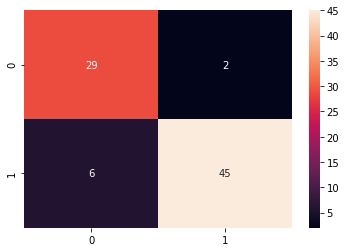

In [422]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [204]:
from sklearn.metrics import accuracy_score,f1_score
f1_score(y_test,y_pred)

0.9072164948453608

In [205]:
accuracy_score(y_test,y_pred)

0.8902439024390244